In [1]:
# ECE 276B Spring 2019
# Andrea Frank
# Hw 1, Problem 3b

import numpy as np
import traceback
import itertools as it
import matplotlib.pyplot as plt

In [2]:
# Time horizon
T = 3

# Number of control inputs
nu = 2

# Transition matrices
A = np.array(
    [[0.75, -1],
     [ 1, 0.75]]
    )
B = np.array(
    [[  1, 0.5],
     [0.5, 0.5]]
    )


def get_X(N=100,Xmax=2, Xmin=-2, d=2):
    return np.transpose(np.array([x for x in it.product(np.linspace(Xmin, Xmax, N),np.linspace(Xmin, Xmax, N))]))


# Cost function
def l(x,u=0):
    """
    Cost function for this problem.
    Input:      x, np.ndarray (1-D), state vector
                u, int or double, control input (doesn't affect output)
    Output:     cost value, double
    """
    if(len(x.shape)>1):
        return 0.5*np.sum(np.square(x), axis=-2)
    return 0.5*np.sum(np.square(x))
    

        
def q(x):
    return l(x)
        

        

In [3]:
# X = get_X(N=15, Xmax=1, Xmin=-1)
# X_0 = np.transpose(X)
# X_1 = np.transpose(np.matmul(A,X))
# X_2 = np.transpose(np.matmul(A,np.matmul(A,X)))

# colors=['r','b']#,'g','m','k']
# n=len(colors)
# S = [A,B]

# fig, axs = plt.subplots(1,2, figsize=(12,8))


# # for i,C in enumerate(S):
# #     x = [np.transpose(X)]
# #     xt = X
# #     for j in range(n):
# #         xt = np.matmul(C,xt)
# #         x.append(np.transpose(xt))


# #     x = np.transpose(np.array(x), (1,0,2))
# #     x.shape
# #     # foo = np.array([[x,y,z] for x,y,z in zip(X_0,X_1,X_2)])

# # #     [plt.plot(x[i,:,0], x[i,:,1]) for i in range(len(foo))];
# #     axs[i].quiver(x[:,0:-2,0], x[:,0:-2,1], (x[:,1:-1,0]-x[:,0:-2,0]), (x[:,1:-1,1]-x[:,0:-2,0]), color=colors,
# #                scale=10, headwidth=5, headlength=3, headaxislength=2, width=.005,
# #                minshaft=2, minlength=2)
# #     axs[i].axis([-1,1,-1,1])
# #     axs[i].set_aspect('equal', adjustable='box')
# #     plt.draw()
    
# for i,C in enumerate(S):
#     X1 = np.matmul(C,X)
    
#     axs[i].quiver(*X, *(X1-X),
#                   scale=15, headwidth=5, headlength=3, headaxislength=2, width=.005,
#                   minshaft=2, minlength=2, color=V(0,X))
#     axs[i].axis([-1,1,-1,1])
#     axs[i].set_aspect('equal', adjustable='box')
#     plt.draw()
    


In [4]:
# def dp(t,xt,T=T):
#     q = Q(t,xt,T)
#     v = np.min(q)
#     pi = np.argmin(q)
    
#     return pi,v
    

# def Q(t,xt,T=T):
#     # For each state recursion
#     if (len(xt.shape)==1):   # Once you're at a single state
#         # Calculate Q recursion
#         if (t==T):
#             return q(xt)
#         else:
#             next_x = np.array([np.matmul(A,x), np.matmul(B,x)])
#             next_v = np.zeros(next_x.shape[0])
#             for i,nx in enumerate(next_x):
#                 next_q = Q(t+1,nx,T)
#                 next_v[i] = np.min(next_q)
#             return l(xt) + next_v
        
#     # Handle input of multiple states at once
#     else:
#         QQ = np.zeros(xt.shape[0], nu)
#         for i,XT in enumerate(xt):
#             QQ[i] = Q(t,XT,T)
#         return QQ




# # Dynamic Programming
# def DP(t,xt,T=T,V=None,PI=None):
#     # Base case
#     if (t==T):
#         return 0, q(xt)
    
#     # Recursive case
#     else:
#         # Possible next transitions for each control input
#         next_x = np.array([np.matmul(A,x), np.matmul(B,x)])
#         # Value associated with each choice
#         next_v = np.zeros(next_x.shape[0])
#         print('t{} v{}'.format(t,next_v))
#         for i,nx in enumerate(next_x):
#             _, next_v[i] = DP(t+1, nx, T)
#         Q = l(xt) + next_v
#         v = np.min(Q)
#         pi = np.argmin(Q)
        
# #         print('t: {}, xt: {}, next_x: {}, nv: {}, v: {}, l(xt): {}, q: {}'.format(t, xt, next_x, next_v, v, l(xt), Q))
        
#         return pi, v
        

# def dp(t,xt,T=T):
#     q = Q(t,xt,T)
#     v = np.min(q)
#     pi = np.argmin(q, axis=0)
    
#     return pi,v

def DP(t,xt,T=T):
    if (t==T):
        return None, q(xt)    
    else:
        qq = Q(t,xt,T=T)
#         print("t: {}\tQ: {}".format(t,qq))
        v = np.min(qq,axis=0)
        pi = np.argmin(qq,axis=0)
        return pi, v

def V(t,xt,T=T):
    _, v = DP(t,xt,T=T)
    return v

def PI(t,xt,T=T):
    pi, _ = DP(t,xt,T=T)
    return pi
    
# def V(t,xt,T=T):
#     if (t==T):
#         return q(xt)    
#     else:
#         qq = Q(t,xt,T=T)
# #         print('t{} q{}'.format(t,qq.shape))
#         v = np.min(qq,axis=0)
# #         print('t{} v{}'.format(t,v.shape))
#         return v
    
def Q(t,xt,T=T):
    try:
        next_x = np.stack([np.matmul(A,xt), np.matmul(B,xt)])
    except ValueError:
        xt = np.expand_dims(xt,-1)
        next_x = np.stack([np.matmul(A,xt), np.matmul(B,xt)])
    return V(t+1,next_x,T=T) + np.expand_dims(l(xt),0) 


In [5]:
# OPTIONS x FEATURES x TIMEPOINTS
# State space
N = 100  # Number of states to sample
d = 2  # Dimensionality of state
Xmax = 2
Xmin = -2

    



# for i in range(T):
#     pi, v = DP(i,x)
#     print("i: {},\tV: {},\tpi: {}".format(i, v, pi))
    # print("V: {}".format(v))
#     print("pi: {}".format(pi))

In [6]:
# # Dynamic Programming
# def DP(t,xt,T=T,V=None,PI=None):
#     # Base case
#     if (t==T):
#         return 0, q(xt)
    
#     # Recursive case
#     else:
#         # Possible next transitions for each control input
#         next_x = np.array([np.matmul(A,x), np.matmul(B,x)])
#         # Value associated with each choice
#         next_v = np.zeros(next_x.shape[0])
#         print('t{} v{}'.format(t,next_v))
#         for i,nx in enumerate(next_x):
#             _, next_v[i] = DP(t+1, nx, T)
#         Q = l(xt) + next_v
#         v = np.min(Q)
#         pi = np.argmin(Q)
        
# #         print('t: {}, xt: {}, next_x: {}, nv: {}, v: {}, l(xt): {}, q: {}'.format(t, xt, next_x, next_v, v, l(xt), Q))
        
#         return pi, v
    
# pi, v = DP(1,x)

In [18]:
# OPTIONS x FEATURES x TIMEPOINTS
# State space
N = 100  # Number of states to sample
d = 2  # Dimensionality of state
Xmax = 2
Xmin = -2
X = np.transpose(np.array([x for x in it.product(np.linspace(Xmin, Xmax, N),np.linspace(Xmin, Xmax, N))]))


In [19]:
# Time horizon
T = 3

# Number of control inputs
nu = 2

# Transition matrices
A = np.array(
    [[0.75, -1],
     [ 1, 0.75]]
    )
B = np.array(
    [[  1, 0.5],
     [0.5, 0.5]]
    )


# Cost function
def l(x,u=0):
    """
    Cost function for this problem.
    Input:      x, np.ndarray (1-D), state vector
                u, int or double, control input (doesn't affect output)
    Output:     cost value, double
    """
    if(len(x.shape)>1):
        return 0.5*np.sum(np.square(x), axis=-2)
    return 0.5*np.sum(np.square(x))
    

        
def q(x):
    return l(x)

In [20]:
import itertools as it

T = 3
t = 0
Nt = (T-t)
S = [A,B]
I = [0,1]
IN = [I]*Nt
indices = [i for i in it.product(*IN)]
si = np.reshape(np.array(indices), [2]*Nt+[Nt])
SN = np.reshape(np.array([ [S[i] for i in I] for I in indices]), [nu]*Nt + [Nt] + list(A.shape)) 
# Index SN with (i,j,...k,t,A_i,A_j)
#  i.e. (0,0,0,0,4) gives the transition matrix at t=4 if we choose path AAAA

In [21]:
QQ = np.zeros((nu**Nt,X.shape[1]))
# I is sets of indices, e.g. (0,0,0,1); (1,0,1,0)
# i is each index of I, e.g. 0, 1
for ii,I in enumerate(indices):
    transitions = [S[i] for i in I]
    xp = X
    # Walk through timesteps
    for Ct in transitions:
        xp = np.matmul(Ct,xp)
        QQ[ii] += l(xp)
QQ += l(X)

In [22]:
v = np.min(QQ, axis=0)
pi = np.argmin(QQ, axis=0)

def get_pi_t(pi,t):
    return np.array([indices[i] for i in pi])[:,t]

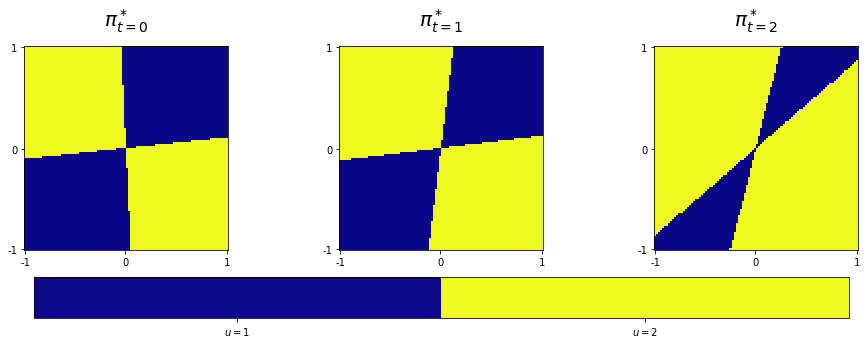

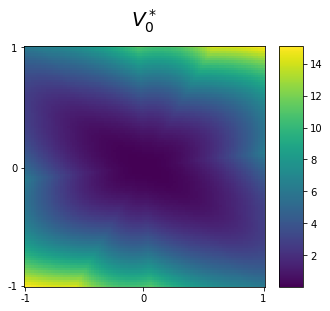

In [27]:
f = plt.figure(figsize=(16,5))
# Plot policies
for t in range(T):
    ax = f.add_subplot(1,T,t+1,  
                     xticks=[0, N/2-1, N-1], xticklabels=['-1','0','1'],
                     yticks=[0, N/2-1, N-1], yticklabels=['-1','0','1'])
    ax.set_title(r'$\pi^*_{{t={}}}$'.format(t), fontsize=20, pad=20)
    img = ax.imshow(np.reshape(PI(t,X), (N,-1)), cmap='plasma', origin='lower')

cbar = f.colorbar(img, ax=f.get_axes()[0:T], orientation='horizontal'
                  , boundaries=[0, 0.5, 1], values=[0,1], pad=0.1)
cbar.set_ticks([0.25,0.75])
cbar.set_ticklabels([r'$u=1$',r'$u=2$'])


    
f2 = plt.figure(figsize=(5,5))
# Plot value function
ax = f2.add_subplot(1,1,1,  
                 xticks=[0, N/2-1, N-1], xticklabels=['-1','0','1'],
                 yticks=[0, N/2-1, N-1], yticklabels=['-1','0','1'])
ax.set_title(r'$V^*_{{0}}$', fontsize=20, pad=20)
img = ax.imshow(np.reshape(V(0,X), (N,-1)), cmap='viridis', origin='lower')
    
# plt.subplots_adjust(wspace=.5, hspace=.1)

    



# cbar = f2.colorbar(img, pad=0.1, shrink=0.5, aspect=10)

from mpl_toolkits.axes_grid1 import make_axes_locatable


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.2)
f2.colorbar(img, cax=cax)

# plt.tight_layout(h_pad=1)


In [24]:
PI(2,X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
f.get_axes()